# Linear Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
tes = pd.read_csv('../Capstone_csv_file/tes_stats_salary_19-20')
tes.head()

,NAME,TGT,REC,TGT/G,YDS,100+ YDS,YDS/REC,TD,LONG,FUM,...,REC_rank,TGT/G_rank,100+ YDS_rank,YDS/REC_rank,TD_rank,LONG_rank,FUM_rank,FUML_rank,overall,salary
0,Travis Kelce,136,97,8.5,1229,2,12.7,5,47,1,...,1.0,2.5,6.0,10.5,10.0,15.5,52.0,58.5,15.80,9368400
1,Delanie Walker,31,21,4.4,215,0,10.2,2,29,1,...,41.5,23.0,39.5,37.5,38.5,39.0,52.0,27.0,38.15,8500000
2,Zach Ertz,135,88,9.0,916,1,10.4,6,30,1,...,3.0,1.0,11.5,35.0,5.0,36.5,52.0,58.5,20.85,8500000
3,Jared Cook,65,43,4.6,705,0,16.4,9,61,0,...,15.0,20.0,39.5,1.5,2.0,5.0,21.5,27.0,15.50,7500000
4,Greg Olsen,82,52,5.9,597,1,11.5,2,41,0,...,11.0,9.5,11.5,22.5,38.5,19.0,21.5,27.0,18.25,7000000


In [3]:
tes.columns

Index(['NAME', 'TGT', 'REC', 'TGT/G', 'YDS', '100+ YDS', 'YDS/REC', 'TD',
       'LONG', 'FUM', 'FUML', 'YDS_rank', 'TGT_rank', 'REC_rank', 'TGT/G_rank',
       '100+ YDS_rank', 'YDS/REC_rank', 'TD_rank', 'LONG_rank', 'FUM_rank',
       'FUML_rank', 'overall', 'salary'],
      dtype='object')

In [4]:
model = LinearRegression()

In [5]:
X = tes[['TGT', 'REC', 'TGT/G', '100+ YDS', 'YDS/REC', 'TD',
         'LONG', 'FUM', 'FUML']]
y = tes['salary']

In [6]:
X.shape

(40, 9)

In [7]:
y.shape

(40,)

In [8]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
y_pred = model.predict(X)

In [10]:
def MSE(y_true, y_pred):
    squared_error = 0
    for i in range(len(y_true)):
        squared_error += (y_true[i] - y_pred[i]) ** 2
    return squared_error / len(y_true)

In [11]:
np.sqrt(MSE(y, y_pred))

2355797.291087926

In [12]:
model.intercept_

2529721.583305637

In [13]:
model.coef_

array([   32514.65724722,   118957.73818694,  -263183.69374279,
        -287557.70811228,   -27360.45537057,  -232918.06767924,
         -39882.37383939,   131029.12619556, -3453264.10382819])

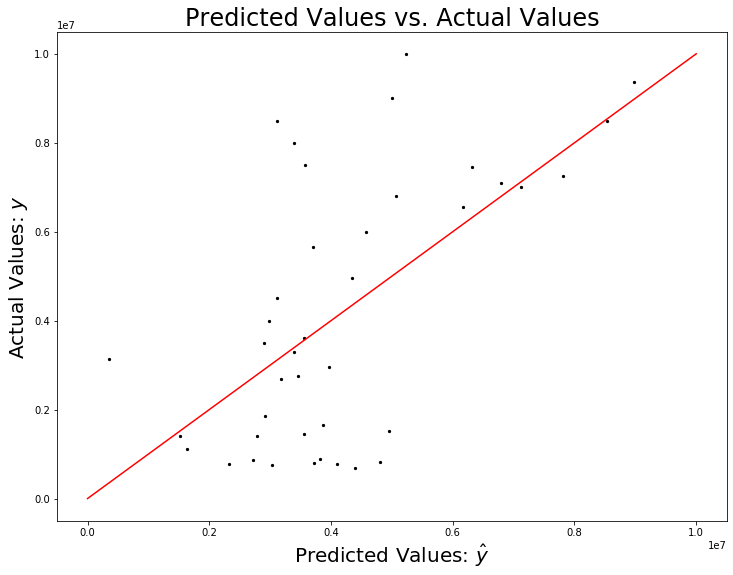

In [14]:
plt.figure(figsize=(12,9))

plt.scatter(y_pred, y, s=5, color='black')

plt.plot([0, np.max(y)],
         [0, np.max(y)],
         color = 'red')

plt.xlabel("Predicted Values: $\hat{y}$", fontsize = 20)
plt.ylabel("Actual Values: $y$", fontsize = 20)
plt.title('Predicted Values vs. Actual Values', fontsize = 24);

In [15]:
r2_score(y, y_pred)

0.3721359534636286